In [1]:
%load_ext tikzmagic
%matplotlib inline

# 상관관계

어떤 데이터의 값이 증가할 때 다른 데이터의 값이 그에 따라 같이 증가하거나 혹은 반대로 감소하는 경향이 있을 때 두 데이터는 <b>상관관계가 있다(correlated)</b>고 한다.

다음 데이터는 보스턴 외곽에 있는 여러 지역(county)의 주택 가격에 대한 데이터다.

In [2]:
import statsmodels.api as sm

df = sm.datasets.get_rdataset("Boston", "MASS").data
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


각 열이 뜻하는 바는 다음과 같다.

* crim: 범죄율
* zn: 25,000평방피트를 초과하는 거주지역 비율
* indus: 비소매상업지역 면적의 비율
* chas: 찰스강의 경계에 위치한 경우는 1, 아니면 0
* nox: 일산화질소 농도
* rm: 주택당 방 수
* age: 1940년 이전에 건축된 주택의 비율
* dis: 직업센터의 거리
* rad: 방사형 고속도로까지의 거리
* tax: 재산세율
* ptratio: 학생/교사 비율
* black: 인구 중 흑인 비율
* lstat: 인구 중 하위 계층 비율
* medv: 해당 지역의 주택가격 중앙값






스캐터플롯에서 볼 수 있듯이 주택가격 medv 값은 방의 개수 rm가 증가할 수록 커지는 경향이 있다. 이 때는 양의 상관관계를 가진다고 한다.

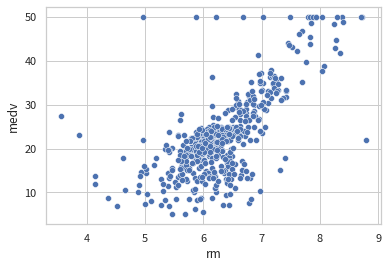

In [3]:
import seaborn as sns

sns.scatterplot(x="rm", y="medv", data=df)
plt.show()

반대로 하위 계층 비율 lstat이 증가하면 주택가격은 떨어지는 경향이 있다. 이 때는 음의 상관관계를 가진다고 한다.

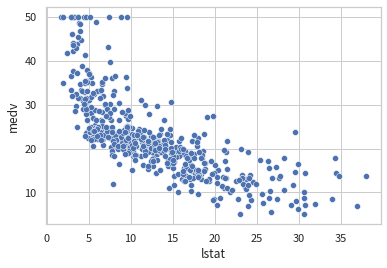

In [4]:
sns.scatterplot(x="lstat", y="medv", data=df)
plt.show()

방의 개수와 흑인 비율은 어떠한 상관관계도 보기 어렵다. 이 때는 상관관계가 거의 없다고 한다.

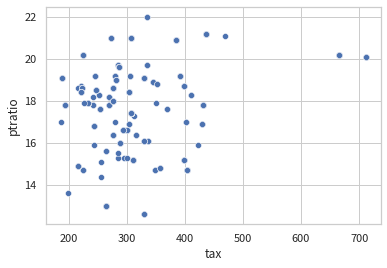

In [5]:
sns.scatterplot(x="tax", y="ptratio", data=df)
plt.show()

## 상관계수

상관관계의 정도를 정량적으로 수치화한 것을 <b>상관계수(correlation coefficient)</b>라고 한다. 데이터 $x$와 $y$ 사이의 상관계수 $r_{xy}$는 다음 공식으로 계산한다.

$$
r_{xy} = \dfrac{s_{xy}}{\sqrt{s^2_{x} \cdot s^2_{y}}}
$$

이 식에서 $s_{x}^2$, $s_{y}^2$, $s_{xy}$는 각각 $x$의 분산(variance), $y$의 분산, $x$와 $y$ 사이의 공분산(covariance)을 뜻하며 다음 공식으로 계산한다.

$$
s_{x} = \dfrac{1}{N}\sum_{i=1}^N (x_i - \bar{x})^2
$$

$$
s_{y} = \dfrac{1}{N}\sum_{i=1}^N (y_i - \bar{y})^2
$$

$$
s_{xy} = \dfrac{1}{N}\sum_{i=1}^{N} (x_i-\bar{x})(y_i-\bar{y})
$$

위 식에서 $\bar{x}$, $\bar{x}$는 각각 $x$, $y$의 평균을 뜻한다.

상관계수는 다음과 같은 성질이 있다.

* -1보다 같거나 크고 1보다 같거나 작다. 
* 상관계수의 값이 양수이면 양의 상관관계를 가진다.
* 상관계수의 값이 음수이면 음의 상관관계를 가진다.
* 상관관계가 강할수록 상관계수의 절대값이 커진다.
* 완전히 같은 데이터 사이의 상관계수는 1이다.
* 절대값이 완전히 같고 부호가 반대인 데이터 사이의 상관계수는 -1이다.


다음 그림에서 이러한 성질을 확인할 수 있다.

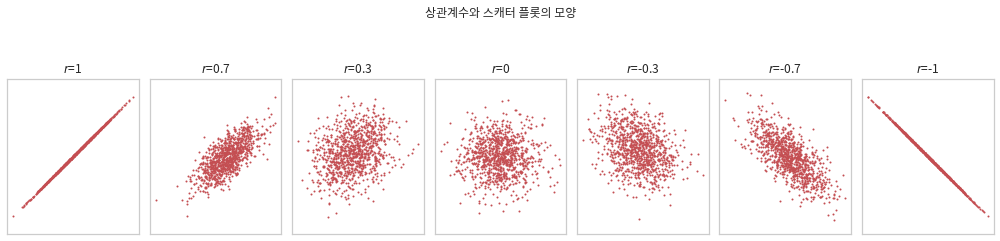

In [6]:
np.random.seed(0)
corrs = [1, 0.7, 0.3, 0, -0.3, -0.7, -1]
plt.figure(figsize=(len(corrs) * 2, 3))
for i, r in enumerate(corrs):
    x, y = np.random.multivariate_normal([0, 0], [[1, r], [r, 1]], 1000).T
    plt.subplot(1, len(corrs), i + 1)
    plt.plot(x, y, 'ro', ms=1)
    plt.axis('equal')
    plt.xticks([])
    plt.yticks([])
    plt.title(r"$r$={}".format(r))

plt.suptitle("상관계수와 스캐터 플롯의 모양", y=1.1)
plt.tight_layout()
plt.show()

하지만 스캐터 플롯의 기울기와 상관관계는 아무런 상관이 없다.

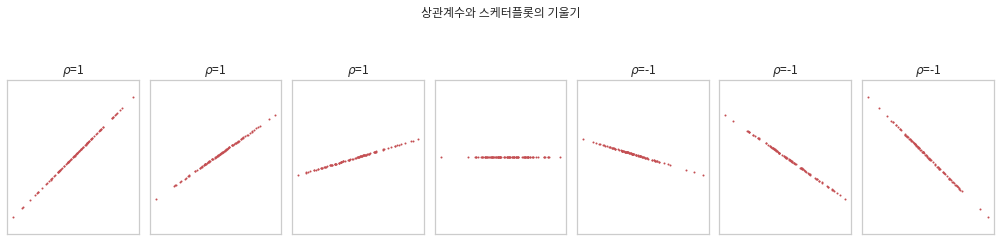

In [7]:
np.random.seed(1)
slope = [1, 0.7, 0.3, 0, -0.3, -0.7, -1]
plt.figure(figsize=(len(slope) * 2, 3))
for i, s in enumerate(slope):
    plt.subplot(1, len(slope), i + 1)
    x, y = np.random.multivariate_normal([0, 0], [[1, 1], [1, 1]], 100).T
    y2 = s * y
    plt.plot(x, y2, 'ro', ms=1)
    plt.axis('equal')
    plt.xticks([])
    plt.yticks([])
    if s > 0:
        plt.title(r"$\rho$=1")
    if s < 0:
        plt.title(r"$\rho$=-1")

plt.suptitle("상관계수와 스케터플롯의 기울기", y=1.1)
plt.tight_layout()
plt.show()

데이터 간의 상관계수를 표시할 때는 상관계수행렬을 사용하는 경우가 많다. 예를 들어 데이터 $x, y, z$가 있을 때 이 데이터 사이의 상관관계계수들은 다음과 같은 행렬 형태로 표시한다.

$$ 
\begin{bmatrix}
r_{xx} & r_{xy} & r_{xz} \\
r_{yx} & r_{yy} & r_{yz} \\
r_{zx} & r_{zy} & r_{zz} \\
\end{bmatrix}
$$

numpy 패키지의 `corrcoef` 함수를 사용하면 상관계수 행렬을 계산할 수 있다. 예를 들어 주택가격의 중앙값 medv와 방의 개수 rm 사이의 상관계수는 다음과 같이 계산한다.

In [8]:
import numpy as np

np.corrcoef(df.medv, df.rm)

array([[1.        , 0.69535995],
       [0.69535995, 1.        ]])

pandas 데이터프레임은 데이터 사이의 상관계수 행렬을 계산하는 `corr` 메서드를 제공한다.

In [9]:
df_corr = df.corr()
df_corr

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


이 자료에서 주택가격인 medv 데이터와 다른 데이터간의 상관계수 순위를 계산하면 다음과 같이 방의 개수 rm과 가장 상관계수가 높다는 것을 알 수 있다.

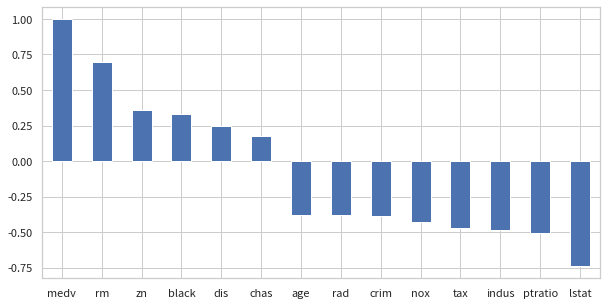

In [10]:
medv_corr = df_corr["medv"].sort_values(ascending=False)
medv_corr.plot(kind="bar", figsize=(10, 5), rot=0)
plt.show()